In [8]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

## Loading the generator model

In [4]:
generator = tf.keras.models.load_model('celebGAN/generator_model/generator.h5')

## Generates a single image

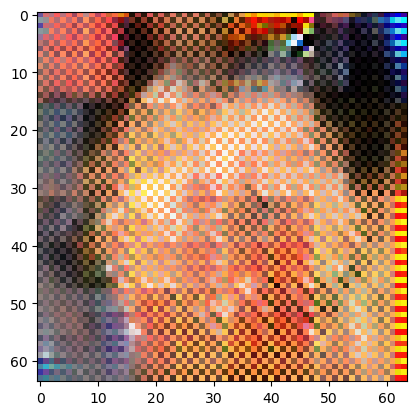

In [42]:
lv = tf.random.normal([1, 128])
image = generator(lv, training=False)
imagenorm = image*127.5+127.5
imagenp = imagenorm.numpy()[0,:,:,:]
plt.imshow(imagenp.astype(dtype="int32"), interpolation='antialiased', interpolation_stage="rgba")

## Generating multiple Images as a singular plot
Generates 100 images in batches of 25 to run with less memory overhead

(100, 64, 64, 3)


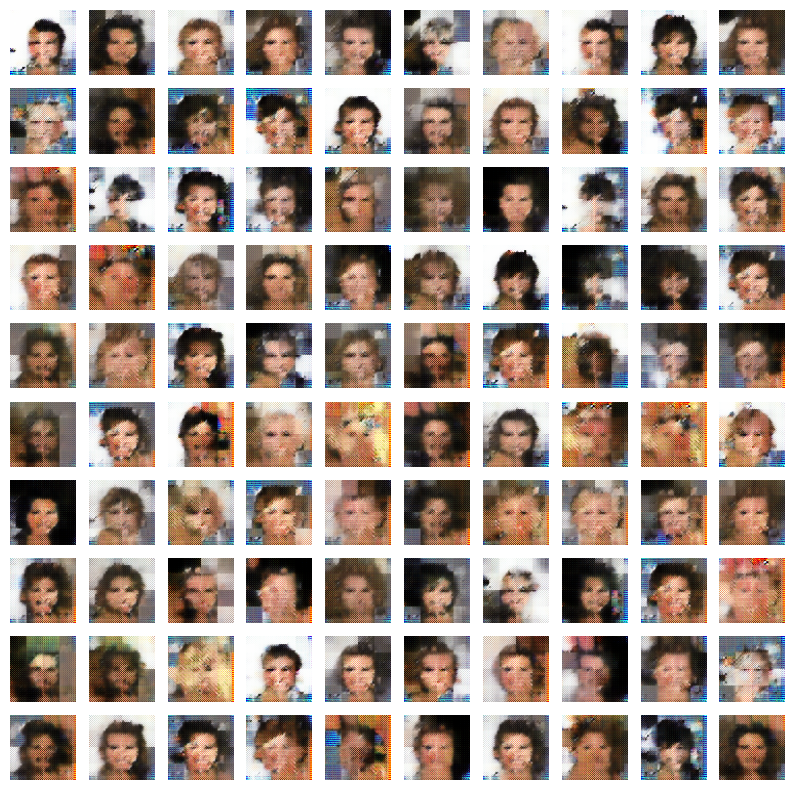

In [7]:
images = 25
predictions = np.empty([100,64,64,3])
for i in range(4):
    seed = tf.random.normal([images, 128])
    label_seed = np.random.randint(0,2, images)
    pred = generator(seed, training=False).numpy()
    predictions[25*i:25*(i+1), :, :, :] = pred
    
print(predictions.shape)
figsize = 10
fig = plt.figure(figsize=(figsize, figsize))  
for i in range(predictions.shape[0]):
    plt.subplot(figsize, figsize, i+1)
    plt.imshow((predictions[i, :, :, :]*127.5+127.5).astype("int32"), interpolation='antialiased', interpolation_stage="rgba")
    plt.axis('off')
plt.show()